# Importing Header and SoilPrep

In [18]:
import import_ipynb 
from Header import *

In [19]:
import import_ipynb
from SoilPrep import * 

# Step 0: Setting up decision parameters (Data Tree)

In [68]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg1', 'sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51, 71, 91]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['mult', 'cubist', 'svr',  'ridge', 'plsr',  'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Sand', 'Silt', 'Clay', 'TOC']

# 3. Available preprocessing for Target data -------------------------------------- (3)
prepare_target = ['none']
# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'cr', 'log', 'fod_spec', 'fod_cr', 'fod_log', 'cr_log']

# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [0,2,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30,31,33,35,37,39, 40, 45, 50, 55, 60, 70, 80, 90, 100]


# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A', 'green']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [70]:
MetaData = {'sg_filters' : sg_filters, 'window_lengths' : window_lengths, 'prepare_spec' : prepare_spec, \
            'nbands_sampling' : nbands_sampling, 'target_names' : target_names, 'prepare_target' : prepare_target,\
            'ml_methods' : ml_methods, 'clr' : clr}

with open ('meta_data.pickle', 'wb') as file:
    pickle.dump(MetaData, file)

# Step 1a: Obtaining Spectra (Noise and Outliers removal)

In [22]:
df = pd.read_csv('uae.csv')
spectra = df.iloc[:, 7:2158].copy()
temp_spec = spectra.copy()
spectra = temp_spec.iloc[:,50:2151].copy()
spectra.head(5)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.132197,0.131488,0.132576,0.132722,0.132029,0.134659,0.135678,0.135074,0.135785,0.137270,0.138130,0.136568,0.137646,0.139148,0.139250,0.140026,0.140361,0.140902,0.142279,0.143269,0.144129,0.145348,0.146130,0.146498,0.147298,0.148430,0.149082,0.149506,0.150597,0.152064,0.153333,0.154457,0.155716,0.156826,0.157711,0.158354,0.159543,0.161235,0.162204,0.162983,0.163930,0.165430,0.167121,0.168589,0.169168,0.170028,0.170997,0.172139,0.173340,0.174260,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.470410,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,0.108211,0.108199,0.109094,0.109304,0.109066,0.111004,0.111819,0.111446,0.111792,0.113418,0.114383,0.112376,0.113160,0.114710,0.115185,0.116067,0.116300,0.116528,0.117631,0.118530,0.119337,0.120351,0.121088,0.121666,0.122731,0.123601,0.124131,0.124624,0.125034,0.126265,0.127901,0.129405,0.130446,0.131069,0.131703,0.132317,0.133509,0.135197,0.136465,0.137250,0.137802,0.138892,0.140466,0.141969,0.142429,0.143151,0.144002,0.145012,0.146161,0.146988,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.408520,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323
2,0.087828,0.087517,0.087613,0.087666,0.088152,0.090908,0.091333,0.089935,0.090358,0.092582,0.094041,0.092037,0.092451,0.093886,0.094757,0.095708,0.095993,0.096216,0.097100,0.098248,0.099334,0.099950,0.100686,0.101406,0.102367,0.103358,0.103797,0.103920,0.104431,0.105775,0.107477,0.109034,0.110285,0.111141,0.111802,0.112305,0.113300,0.114846,0.116296,0.117075,0.117460,0.118880,0.120696,0.122197,0.122474,0.123220,0.124188,0.125188,0.126318,0.127030,...,0.254087,0.253243,0.252018,0.250617,0.249314,0.247589,0.246501,0.245682,0.244078,0.242976,0.241615,0.239750,0.238310,0.236734,0.235230,0.233702,0.232329,0.231019,0.229220,0.227910,0.226667,0.224981,0.223713,0.222331,0.220553,0.219432,0.218279,0.216748,0.215095,0.212785,0.210994,0.210149,0.209413,0.208985,0.208481,0.207685,0.206786,0.205675,0.205031,0.203774,0.202939,0.202970,0.201991,0.200577,0.199762,0.198509,0.197953,0.196985,0.196200,0.196456
3,0.164899,0.165540,0.166436,0.166390,0.166166,0.168653,0.169344,0.168497,0.169351,0.171091,0.172429,0.171382,0.172321,0.173848,0.174389,0.175071,0.175229,0.175822,0.177251,0.178497,0.179577,0.180602,0.181626,0.182307,0.183246,0.184355,0.185130,0.185911,0.187020,0.188538,0.189985,0.191576,0.193083,0.194172,0.194997,0.196203,0.197665,0.198978,0.200762,0.202125,0.202995,0.204386,0.206127,0.207846,0.208737,0.209706,0.210652,0.211885,0.213440,0.214459,...,0.477536,0.476374,0.475360,0.474317,0.472941,0.471083,0.469237,0.467607,0.465895,0.464562,0.463261,0.461304,0.459077,0.456753,0.454284,0.452215,0.450451,0.448153,0.445981,0.443916,0.441472,0.439588,0.437714,0.435782,0.434151,0.432324,0.430425,0.428736,0.426160,0.423627,0.422163,0.420034,0.418287,0.417215,0.415542,0.414107,0.413113,0.412229,0.411363,0.410837,0.410158,0.

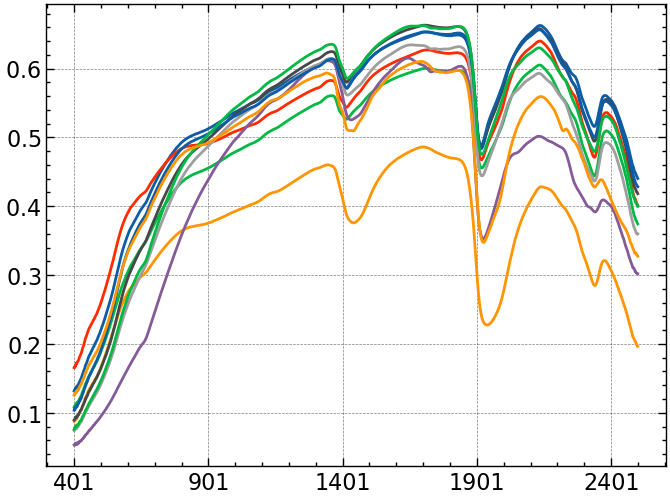

In [23]:
for i in range (0,10,1):
    spectra.iloc[i,1:].plot()

# Step 1b: Obtaining Targets (Outliers removal and Normalization)

In [24]:
df = pd.read_csv('uae.csv')
df.rename(columns = {'clay':'Clay', 'silt': 'Silt', 'sand': 'Sand'}, inplace = True)
# ------------- Target Isolation ----------------------

clr = ['#F4A460', '#8B7355', '#A52A2A', 'green']

def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names)

# Step 1c: Spectra Preprocessing (Smooth, FOD/Contin/Log , and Resample)

## Savgol smoothing (order 1 and order 2)

In [29]:
# -------------- Smoothed Spectra spec1 (savgol order 1) and spec2 (savgol order 2)  -----------

spec1 = {}
for i in window_lengths:
    spec1[i] = filt_sg(spectra, i, 'sg1')                   

spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')

smth_spec = sgsmooth (spectra, 3)    

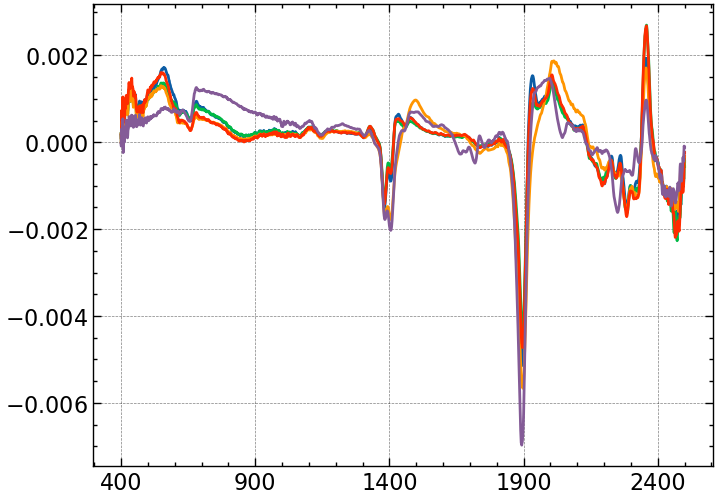

In [43]:
fod_spec = fod(smth_spec)

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


## Continuum Removal

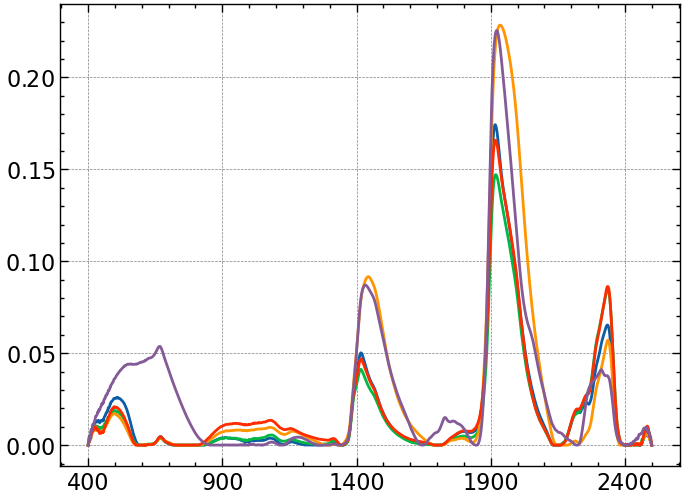

In [44]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

## log(1/R) Transformation

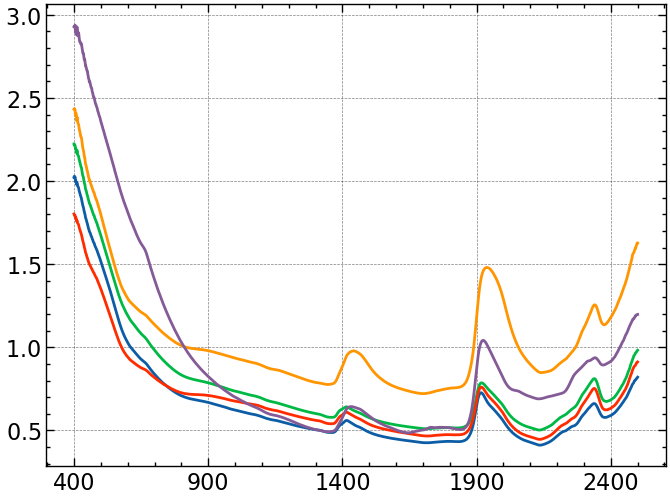

In [45]:
log_spec = ((1/spec2[51]).apply(np.log)).copy()
#log_spec.head(5)

for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec)

In [46]:
sampled_spec = {}
for n in nbands_sampling:
    sampled_spec[n] = resample_spectra (spec2[51], n)

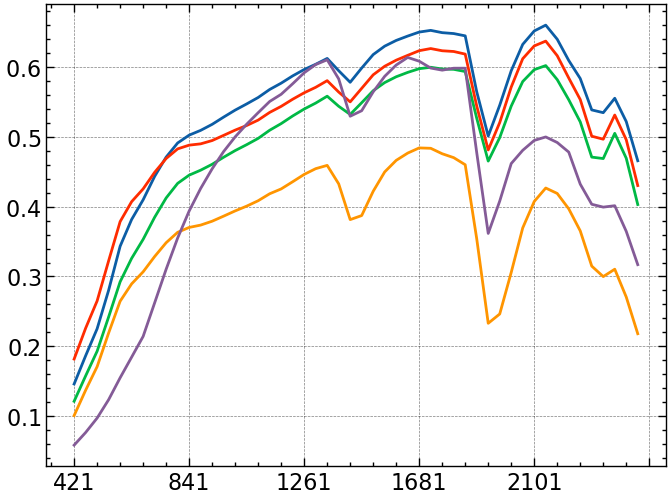

In [48]:
for i in range (0,5,1):
    sampled_spec[50].iloc[i,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

In [49]:
sampled_cr = {}
for n in nbands_sampling:
    sampled_cr[n] = resample_spectra (cr_spec, n)

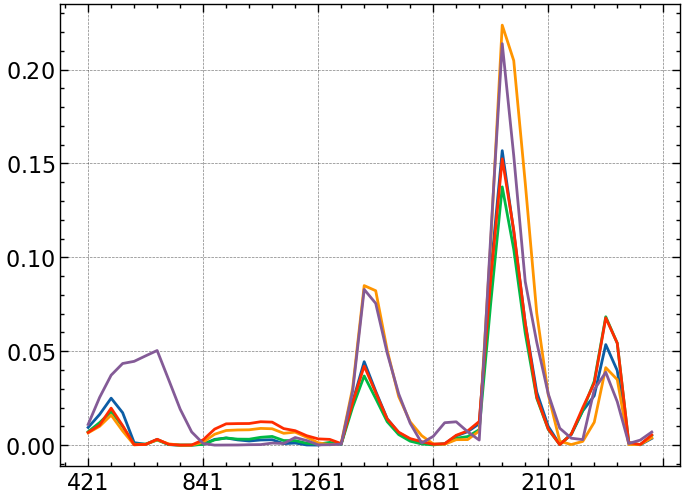

In [51]:
for i in range (0,5,1):
    sampled_cr[50].iloc[i,:].plot()

### 3. Sampled Log (sampled_log)

In [56]:
sampled_log = {}
for n in nbands_sampling:
    sampled_log[n] = resample_spectra (log_spec, n)

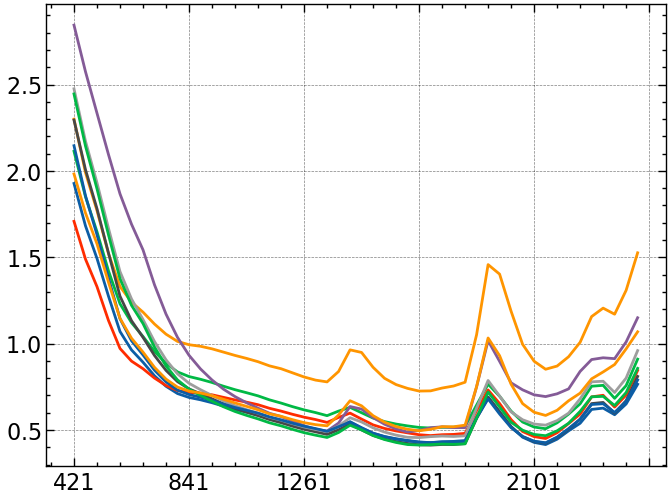

In [58]:
for i in range (0,10,1):
    sampled_log[50].iloc[i,:].plot()

### 4.  FOD of sampled spectra (fod_sampled)

In [53]:
fod_sampled = {}
for n in nbands_sampling:
    fod_sampled[n] = fod (sampled_spec[n])

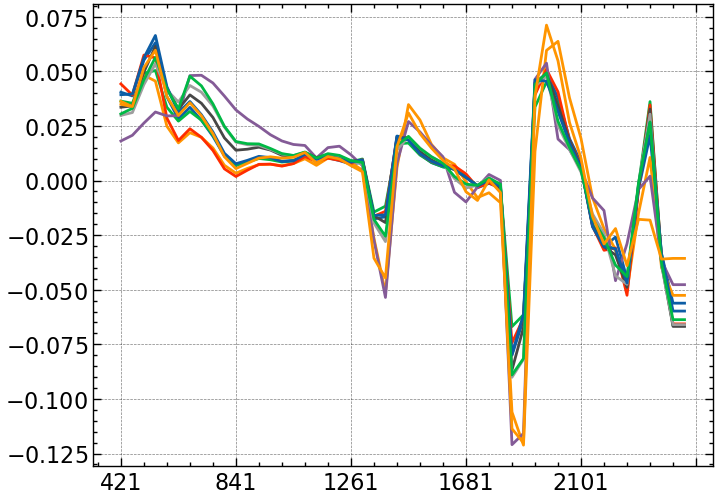

In [55]:
for i in range (0,10,1):
    fod_sampled[50].iloc[i,:].plot()

### 5. FOD of sampled_cr (fod_sampledcr)

In [59]:
fod_cr = {}
for n in nbands_sampling:
    fod_cr[n] = fod (sampled_cr[n])

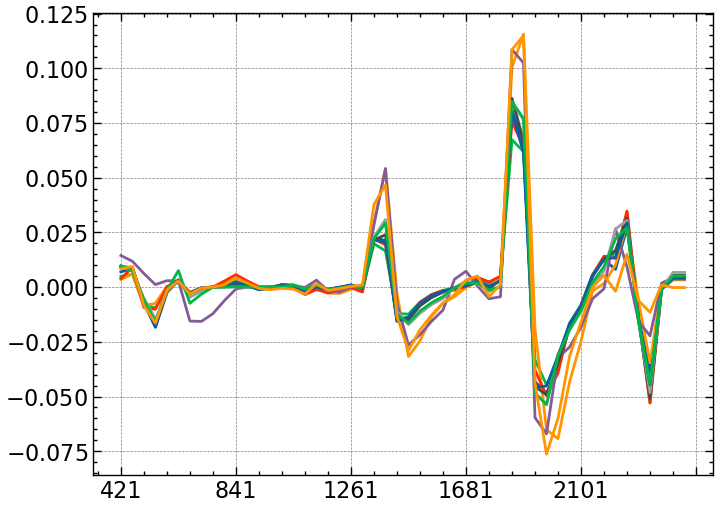

In [62]:
for i in range (0,10,1):
    fod_cr[50].iloc[i,:].plot()

### 6. FOD of sampled_log (fod_sampledlog)

In [63]:
fod_log = {}
for n in nbands_sampling:
    fod_log[n] = fod (sampled_log[n])

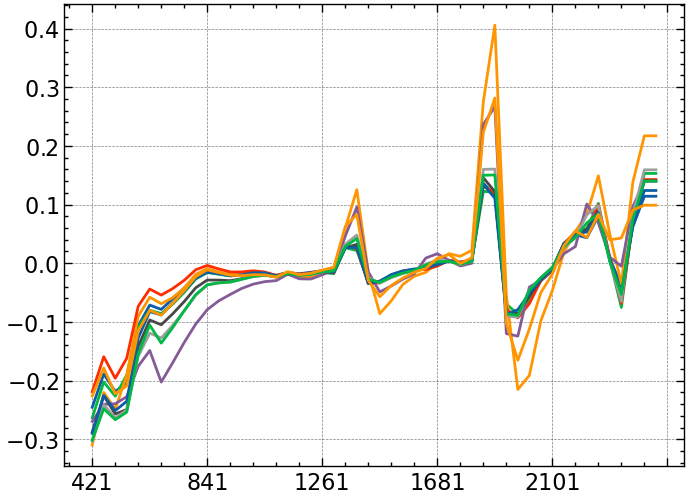

In [64]:
for i in range (0,10,1):
    fod_log[50].iloc[i,:].plot()

### 7. Continuum Removal of Log ( cr_log)

In [100]:
cr_log = {}
for n in nbands_sampling:
    cr_log[n] = continuum_removed(sampled_log[n])

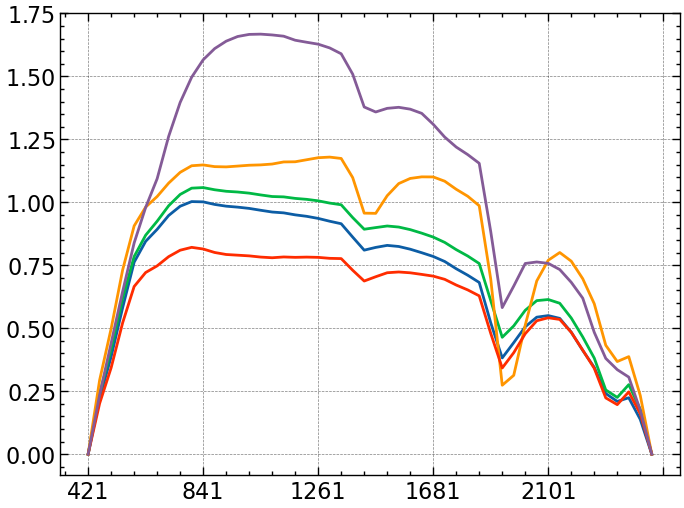

In [101]:
for i in range (0,5,1):
    cr_log[50].iloc[i,:].plot()    

## Visualizing Processed Spectrum (variable samples)

In [102]:
# (row, col) = spectra.shape
# (row, col)

In [103]:
def plot_spec (sample, process):
    (row, col) = spectra.shape
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'cr':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    elif process == 'log':
        x3 = log_spec.iloc[sample,:]/3
        x3.plot()
    else:
        x4 = fod_spec.iloc[sample,:]*100
        x4.plot()
        
    plt.ylim([-0.6, 0.9])

ipywidgets.interact(plot_spec, sample = (0, row, 1), process = prepare_spec)

interactive(children=(IntSlider(value=147, description='sample', max=294), Dropdown(description='process', opt…

<function __main__.plot_spec(sample, process)>

## Correlation between wavelengths and Targets

In [104]:
def find_rpval (spectra, tar):
    (r, c) = spectra.shape
    
    r_val = spectra.iloc[[0], :].copy()
    p_val = spectra.iloc[[0], :].copy()
    
    for j in range(0, c):
        r_val.iloc[0,j], p_val.iloc[0,j] = stats.pearsonr(tar, spectra.iloc[:, j])
    
    return(r_val, p_val)


In [105]:
plt.style.use(['science','notebook','grid'])

def plot_corr (target, prepare, n_bands):
    
    i = target_names.index(target)    
    
    if  prepare == 'none':
        r_val, p_val = find_rpval (sampled_spec[n_bands], T[i])
        r_val.iloc[0,:].plot(color = clr[i])
    elif  prepare == 'cr':
        r_cr, p_cr = find_rpval (sampled_cr[n_bands], T[i])
        r_cr.iloc[0,:].plot(color = clr[i])
    elif prepare == 'log':
        r_log, p_log = find_rpval (sampled_log[n_bands], T[i])
        r_log.iloc[0,:].plot(color = clr[i])
    elif prepare == 'fod_spec':    
        r_fod, p_fod = find_rpval (fod_sampled[n_bands], T[i])
        r_fod.iloc[0,:].plot(color = clr[i]) 
    elif prepare == 'fod_cr':    
        r_sfodcr, p_sfodcr = find_rpval (fod_cr[n_bands], T[i])
        r_sfodcr.iloc[0,:].plot(color = clr[i]) 
    elif prepare == 'fod_log':    
        r_sfodlog, p_sfodlog = find_rpval (fod_log[n_bands], T[i])
        r_sfodlog.iloc[0,:].plot(color = clr[i]) 
    else:
        r_crlog, p_crlog = find_rpval (cr_log[n_bands], T[i])
        r_crlog.iloc[0,:].plot(color = clr[i])
    
    plt.ylim([-0.9, 0.9])


ipywidgets.interact(plot_corr, target = target_names, prepare = prepare_spec, n_bands = nbands_sampling)



interactive(children=(Dropdown(description='target', options=('Sand', 'Silt', 'Clay', 'TOC'), value='Sand'), D…

<function __main__.plot_corr(target, prepare, n_bands)>

# Step 2:  Parameters for Best Train-Test Split  

In [ ]:
tst_siz = 0.20

rand_t = [None] * (len(T))
err_t = [None] * (len(T))

print('Without Normalization:')
for i in range (0,len(T)):
    rand_t[i], err_t[i] = best_split(spectra.copy(), T[i], tst_siz) 
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_t[i], '\t at randome state =', rand_t[i])
    
rand_nt = [None] * (len(T))
err_nt = [None] * (len(T))

print('After Normalization:')
for i in range (0,len(T)):
    rand_nt[i], err_nt[i] = best_split(spectra.copy(), NT[i], tst_siz)     
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_nt[i], '\t at randome state =', rand_nt[i])
    
    

In [ ]:
Data = {'spectra' : spec2[51], 'T' : T, 'NT' : NT, 'spec1': spec1, 'spec2': spec2, 'smth_spec' : smth_spec, 'fod_spec' : fod_spec,  \
       'cr_spec' : cr_spec,  'log_spec' : log_spec, 'sampled_spec' : sampled_spec, 'sampled_cr' : sampled_cr, \
        'fod_sampled' : fod_sampled, 'sampled_log' : sampled_log, 'rand_t' : rand_t, 'rand_nt' : rand_nt}

In [ ]:
with open ('data.pickle', 'wb') as file:
    pickle.dump(Data, file)